In [33]:
##imports and installs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
#!pip install textblob
from youtube_comment_scraper_python import *
import pandas as pd

import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import json
%matplotlib inline


from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px

#!pip install youtube-comment-scraper-python

#youtube.login(username="youtube username",password="youtube password")
#youtube.login_cookie(cookies=list_of_cookies)
#youtube.open("video link")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
## add the link of the video/commnets you want to download
## name of the file you donwloading
link = input("Youtube links: ")
saved = input("Output name: ")
youtube.open(link)


Youtube links:  https://www.youtube.com/watch?v=FtLjCEVf3NQ
Output name:  black_panter_2


{'status': True}

In [8]:
# wait until all the comments are scrapped then continue
response = youtube.video_comments()

Progress: 100%|████████████████████████████████████████████████████████████████████| 200.0/200 [00:16<00:00, 12.25it/s]


In [34]:
#save the response as data
data = response['body']

In [35]:
# If you want to get more data, you can do looping in your code in part of response and data like this

#all_data = []
#for i in range(0, 3): # It will scroll 10 times
#    response = youtube.video_comments()
#    data = response['body']
#    all_data.extend(data)

In [36]:
##save data as a DataFrame
df = pd.DataFrame(data)
df.to_csv(saved)

In [37]:
## convert comments to string andlowercase
df.Comment = df.Comment.astype(str).str.lower()
## import regeular expresion tokenizer

regexp = RegexpTokenizer('\w+')
## create a new colunm for tokenized comments
df['text_token'] =df.Comment.apply(regexp.tokenize)

# stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
#my_stopwords = ['https']
#stopwords.extend(my_stopwords)
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

## remove frequent words
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

## Create a list of all words
all_words = ' '.join([word for word in df['text_string']])

## Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

## Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)

##Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).
## Since our dataset is really small, we don’t filter out any words and set the value to greater or equal to 1 
## (otherwise there are not many words left in this particular dataset)
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
df[['Comment', 'text_token', 'text_string', 'text_string_fdist']].head()


#Next, we perfom lemmatization.
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer


wordnet_lem = WordNetLemmatizer()


df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

## Note that in some datasets, there are no words to lemmatize. We can check this as follows:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

# show level count
df.is_equal.value_counts()

all_words_lem = ' '.join([word for word in df['text_string_lem']])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## create a world cloud of the most frequent words

(-0.5, 599.5, 399.5, -0.5)

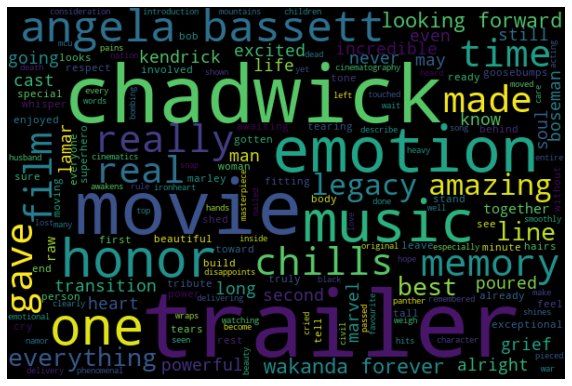

In [38]:
from wordcloud import WordCloud


wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


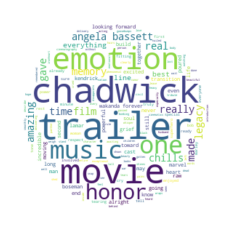

In [39]:

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

nltk.download('punkt')



words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

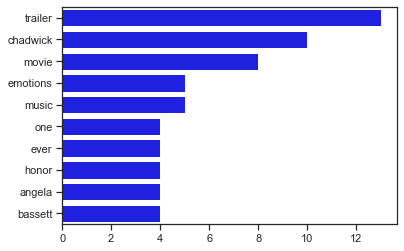

In [40]:
fd.most_common(3)

# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');


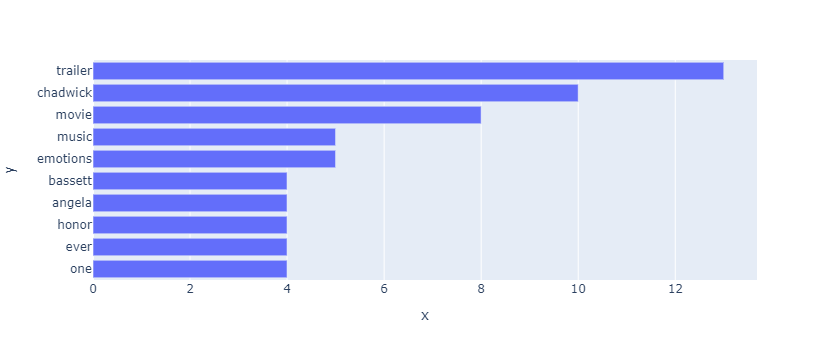

In [41]:

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

In [42]:
#Sentiment analysis


nltk.download('vader_lexicon')


## Initialize an object of SentimentIntensityAnalyzer with name “analyzer”:
analyzer = SentimentIntensityAnalyzer()

df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Comment,Likes,Time,UserLink,user,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
0,that build up toward the end of the trailer is...,12K,1 day ago,https://www.youtube.com/channel/UCB1YLpwYHE653...,AllGoodThingsNetwork,"[build, toward, end, trailer, moving, looking,...",build toward end trailer moving looking forwar...,build toward end trailer moving looking forwar...,build toward end trailer moving looking forwar...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,already tearing up and it’s just the trailer. ...,2.4K,1 day ago,https://www.youtube.com/channel/UC56X0V60pI3Ot...,Andrew Knight,"[already, tearing, trailer, ever, sure, ready,...",already tearing trailer ever sure ready one to...,already tearing trailer ever sure ready one to...,already tearing trailer ever sure ready one to...,True,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp..."
2,this truly is the first time in a long time th...,2.8K,1 day ago,https://www.youtube.com/channel/UCe-upIqhJV-Jy...,Cameron Gurganus,"[truly, first, time, long, time, really, enjoy...",truly first time long time really enjoyed trai...,truly first time long time really enjoyed trai...,truly first time long time really enjoyed trai...,True,"{'neg': 0.111, 'neu': 0.452, 'pos': 0.437, 'co..."
3,"the transition from bob marley's ""no woman no ...",125,8 hours ago,https://www.youtube.com/channel/UC3HgDF_NbOYzr...,Eric Shin,"[transition, bob, marley, woman, cry, kendrick...",transition bob marley woman cry kendrick lamar...,transition bob marley woman cry kendrick lamar...,transition bob marley woman cry kendrick lamar...,True,"{'neg': 0.114, 'neu': 0.623, 'pos': 0.264, 'co..."
4,this trailer is so exceptional this made me sh...,937,1 day ago (edited),https://www.youtube.com/channel/UCubuse9Zt5VdC...,Nickzz,"[trailer, exceptional, made, shed, tears, hono...",trailer exceptional made shed tears honor chad...,trailer exceptional made shed tears honor chad...,trailer exceptional made shed tears honor chad...,True,"{'neg': 0.099, 'neu': 0.733, 'pos': 0.168, 'co..."


In [43]:
df = pd.concat(
    [df.drop(['Likes', 'Time', 'UserLink', 'user'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,Comment,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound
0,that build up toward the end of the trailer is...,"[build, toward, end, trailer, moving, looking,...",build toward end trailer moving looking forwar...,build toward end trailer moving looking forwar...,build toward end trailer moving looking forwar...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,already tearing up and it’s just the trailer. ...,"[already, tearing, trailer, ever, sure, ready,...",already tearing trailer ever sure ready one to...,already tearing trailer ever sure ready one to...,already tearing trailer ever sure ready one to...,True,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.000,0.758,0.242,0.5859
2,this truly is the first time in a long time th...,"[truly, first, time, long, time, really, enjoy...",truly first time long time really enjoyed trai...,truly first time long time really enjoyed trai...,truly first time long time really enjoyed trai...,True,"{'neg': 0.111, 'neu': 0.452, 'pos': 0.437, 'co...",0.111,0.452,0.437,0.8545


In [44]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,Comment,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,sentiment
0,that build up toward the end of the trailer is...,"[build, toward, end, trailer, moving, looking,...",build toward end trailer moving looking forwar...,build toward end trailer moving looking forwar...,build toward end trailer moving looking forwar...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
1,already tearing up and it’s just the trailer. ...,"[already, tearing, trailer, ever, sure, ready,...",already tearing trailer ever sure ready one to...,already tearing trailer ever sure ready one to...,already tearing trailer ever sure ready one to...,True,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.000,0.758,0.242,0.5859,positive
2,this truly is the first time in a long time th...,"[truly, first, time, long, time, really, enjoy...",truly first time long time really enjoyed trai...,truly first time long time really enjoyed trai...,truly first time long time really enjoyed trai...,True,"{'neg': 0.111, 'neu': 0.452, 'pos': 0.437, 'co...",0.111,0.452,0.437,0.8545,positive
3,"the transition from bob marley's ""no woman no ...","[transition, bob, marley, woman, cry, kendrick...",transition bob marley woman cry kendrick lamar...,transition bob marley woman cry kendrick lamar...,transition bob marley woman cry kendrick lamar...,True,"{'neg': 0.114, 'neu': 0.623, 'pos': 0.264, 'co...",0.114,0.623,0.264,0.4767,positive


## Analyze data
# Tweet with highest positive sentiment

In [45]:
df.loc[df['compound'].idxmax()].values

array(["man, no words can describe the beauty of this trailer and all the emotions it wraps together so smoothly. this is a masterpiece that's been pieced together with care and consideration and everything else on top of it.",
       list(['man', 'words', 'describe', 'beauty', 'trailer', 'emotions', 'wraps', 'together', 'smoothly', 'masterpiece', 'pieced', 'together', 'care', 'consideration', 'everything', 'else', 'top']),
       'man words describe beauty trailer emotions wraps together smoothly masterpiece pieced together care consideration everything else top',
       'man words describe beauty trailer emotions wraps together smoothly masterpiece pieced together care consideration everything else top',
       'man words describe beauty trailer emotions wraps together smoothly masterpiece pieced together care consideration everything else top',
       True, {'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'compound': 0.9169},
       0.0, 0.502, 0.498, 0.9169, 'positive'], dtype=object)

In [46]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df.loc[df['compound'].idxmin()].values

array(["that line by angela bassett's character is the most powerful line i've heard in a long time. she lost her husband in that bombing in civil war and her 2 children in the snap so having to rule an entire nation on her own had to weigh heavy on her.",
       list(['line', 'angela', 'bassett', 'character', 'powerful', 'line', 'heard', 'long', 'time', 'lost', 'husband', 'bombing', 'civil', 'war', '2', 'children', 'snap', 'rule', 'entire', 'nation', 'weigh', 'heavy']),
       'line angela bassett character powerful line heard long time lost husband bombing civil war children snap rule entire nation weigh heavy',
       'line angela bassett character powerful line heard long time lost husband bombing civil war children snap rule entire nation weigh heavy',
       'line angela bassett character powerful line heard long time lost husband bombing civil war children snap rule entire nation weigh heavy',
       True,
       {'neg': 0.23, 'neu': 0.667, 'pos': 0.104, 'compound': -0.5267},
  

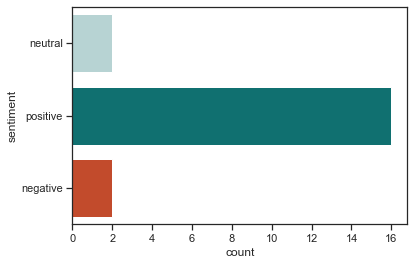

In [47]:
# Visualize data

# Number of tweets 
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );



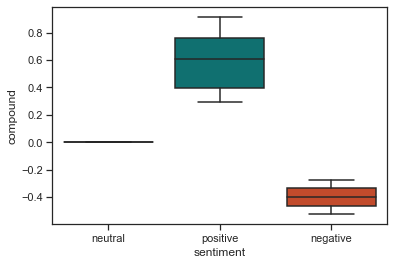

In [48]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

NameError: name 'ids' is not defined

C:\Users\penti\AppData\Local\Temp/ipykernel_23952/4177448429.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Commment = df.Comment.str.replace('[^ws]', '')
C:\Users\penti\AppData\Local\Temp/ipykernel_23952/4177448429.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Commment = df.Comment.str.replace('[^ws]', '')


0                                    (0.0, 1.0)
1                                    (0.0, 0.0)
2                    (0.16666666666666666, 0.3)
3    (-0.08333333333333333, 0.5333333333333333)
4    (0.15000000000000002, 0.35000000000000003)
Name: senti_score, dtype: object